# **⚙️ Setup & Imports**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

In [2]:
data=pd.read_csv('/content/loan_approval_dataset.csv')

# **📂 Data Loading**

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [14]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [15]:
data[' loan_status'].value_counts(normalize=True)

,proportion
loan_status,
Approved,0.62216
Rejected,0.37784


# **🧹 Data Cleaning & Preprocessing**

In [18]:
data.columns = data.columns.str.strip()

In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


# **✨ Feature Engineering**

In [24]:
print(data["loan_status"].unique())
print(data["education"].unique())
print(data["self_employed"].unique())

[' Approved' ' Rejected']
[' Graduate' ' Not Graduate']
[' No' ' Yes']


In [25]:
data['target'] = data['loan_status'].map({' Approved':1,' Rejected':0})

In [26]:
data['education'] = data['education'].map({' Graduate':1,' Not Graduate':0})

In [27]:
data['self_employed'] = data['self_employed'].map({' Yes':1,' No':0})

In [28]:
data['loan_to_income'] = data['loan_amount'] / data['income_annum']

In [29]:
data['total_asset']=(
    data['residential_assets_value'] +
    data['commercial_assets_value'] +
    data['luxury_assets_value'] +
    data['bank_asset_value'])

In [31]:
data['debt_to_assets'] = data['loan_amount'] / (data['total_asset'] + 1)

# **📊 EDA**

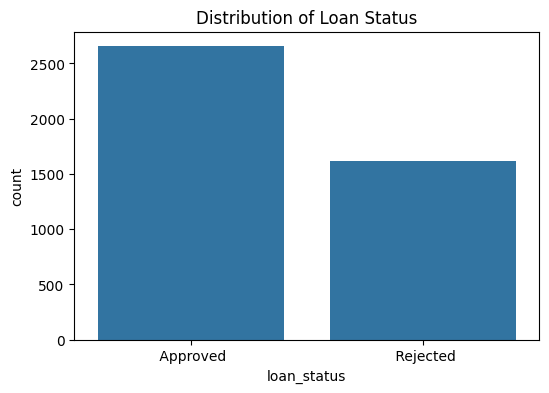

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='loan_status')
plt.title("Distribution of Loan Status")
plt.show()

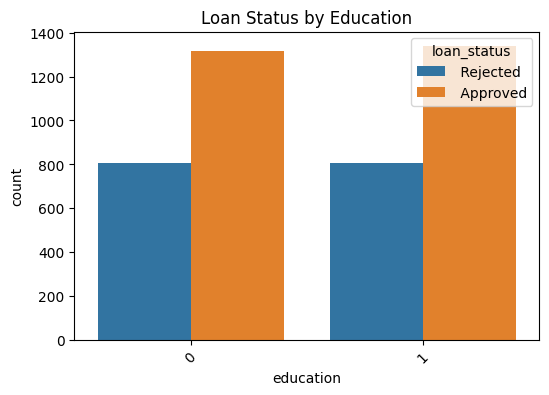

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='education', hue='loan_status')
plt.title("Loan Status by Education")
plt.xticks(rotation=45)
plt.show()

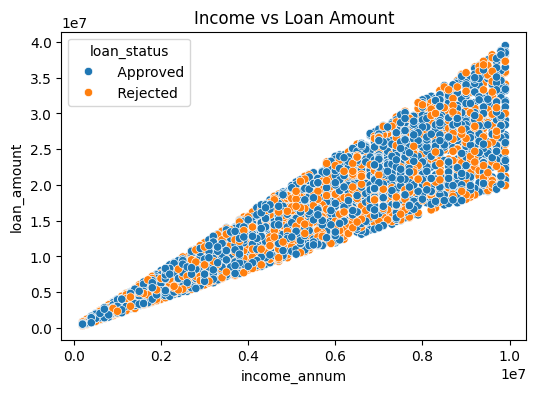

In [37]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='income_annum', y='loan_amount', hue='loan_status')
plt.title("Income vs Loan Amount")
plt.show()

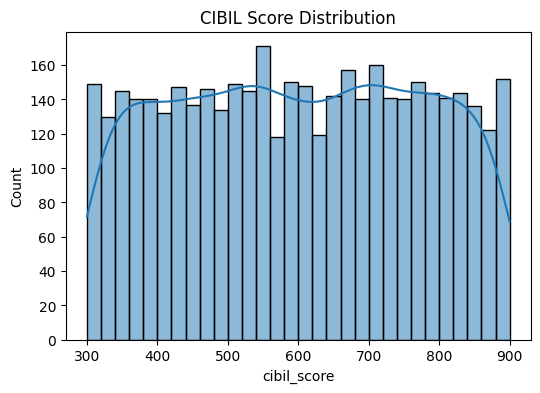

In [38]:
plt.figure(figsize=(6,4))
sns.histplot(data['cibil_score'], bins=30, kde=True)
plt.title("CIBIL Score Distribution")
plt.show()

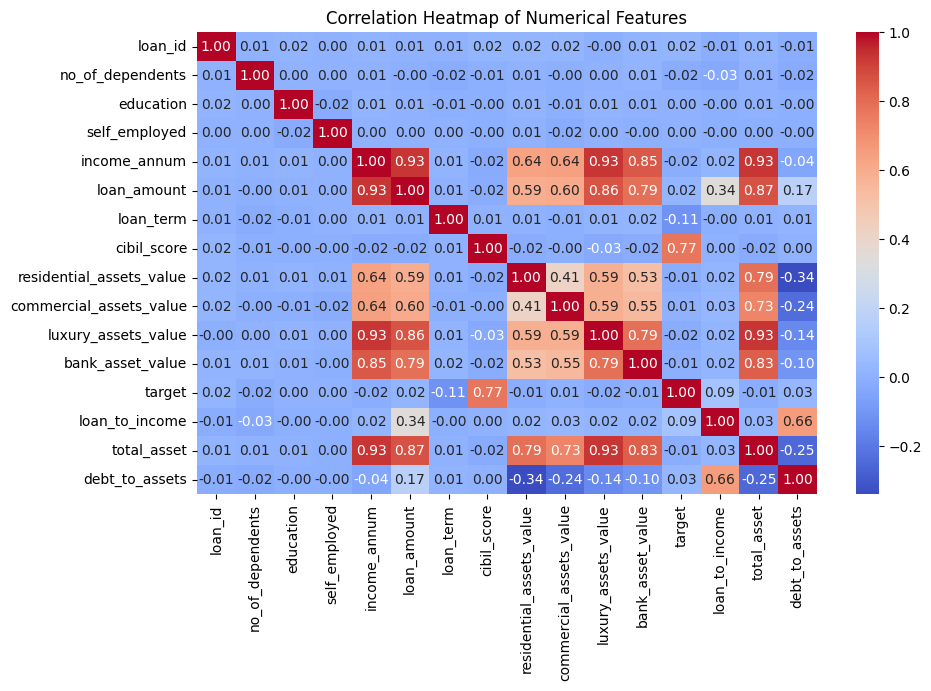

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# **🔁 Train/Test Split**

In [42]:
X = data.drop(['loan_status','target'], axis=1)
y = data['target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3415, 15)
Test set shape: (854, 15)


In [45]:
print("Class distribution in full dataset:")
print(y.value_counts(normalize=True))

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Class distribution in full dataset:
target
1    0.62216
0    0.37784
Name: proportion, dtype: float64

Class distribution in training set:
target
1    0.622255
0    0.377745
Name: proportion, dtype: float64

Class distribution in test set:
target
1    0.62178
0    0.37822
Name: proportion, dtype: float64


# **🤖Baseline Classifier**

In [46]:
from sklearn.dummy import DummyClassifier

In [49]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print("Baseline Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dummy))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dummy))

Baseline Accuracy: 0.6217798594847775

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       323
           1       0.62      1.00      0.77       531

    accuracy                           0.62       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.39      0.62      0.48       854


Confusion Matrix:
 [[  0 323]
 [  0 531]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Logistic Regression Model**

In [50]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.819672131147541

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.66      0.73       323
           1       0.81      0.92      0.86       531

    accuracy                           0.82       854
   macro avg       0.82      0.79      0.80       854
weighted avg       0.82      0.82      0.81       854


Confusion Matrix:
 [[212 111]
 [ 43 488]]


# **Decision Tree,Random Forest,GBM**

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Cross-validation accuracy: 1.0
Decision Tree Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854


Confusion Matrix:
 [[323   0]
 [  0 531]]


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9988290398126464

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854


Confusion Matrix:
 [[322   1]
 [  0 531]]


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", gb.score(X_test, y_test))

Gradient Boosting Accuracy: 1.0
